This Notebook includes soem of the most popular Pytorch interview topics with examples and comments 

In [115]:
#gradient wrt a tensor
tensor = torch.tensor([3.0, 1.0], requires_grad=True)

# Multiply with another Tensor
result = sum(tensor * 2)
print(result)
# Obtain the gradient
result.backward()
print(tensor.grad) #grad is only used for scaler outputs


tensor(8., grad_fn=<AddBackward0>)
tensor([2., 2.])


In [94]:
#Taking gradient
import torch

# Define tensors
x = torch.tensor(3., requires_grad=True)
y = torch.tensor(4., requires_grad=True)
z = 2*x*y + 3

# Visualize the graph
z.backward()
#gradient of z wrt x and y
print(x.grad)
print(y.grad)

tensor(8.)
tensor(6.)


In [3]:
# How to have reprducible results?
# fix seed : torch.manual_seed(0) or torch.cuda.manual_seed(9)
# use deterministic algorithms : torch.use_deterministic_algorithms() --> example?

In [17]:
# reshape tensor dimension:
x = torch.ones(3,4)
x.view(4,1,3)
print(x)
# .reshape() and .resize() also change dimension 

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [18]:
## matrix multiplication 
# torch.matmul and torch.bmm for batch computations 
# also A @ B performs matrix multiplication

In [19]:
## freeze some parameters of "model" (e.g., freeze layer with name fc1)
# for name, param in model.named_parameters():
#     if param.requires_grad and 'fc1' in name:
#         param.requires_grad = False

In [20]:
## change learning rate: use learnign rate scheduler --> step decay : StepLR
# import torch.optim.lr_scheduler as lr_scheduler
# scheduler = lr_scheduler.StepLR(optimizer, step_size = 5, gamma = 0.1) every 5 epochs decrease learning rate by 10%
# at the end of each epoch in training loop add scheduler.step()

In [21]:
## set up pytorch to run on GPU:
# device = torch.device('cuda:0'if torch.cuda.is_available() esle 'cpu')
# model.to(device)
## run model on multiple GPUs:
# if torch.cuda.device_count() > 1: model = nn.DataParallel(model)
## Do something in a specific GPU:
# with torch.cuda.device(1) :  xxx


In [24]:
## How to initialzie parametrs in NN 
## if using built in layers there is default initialization but we may need to change or build custom layers:
#     for p in model.parameters():
#         if p.dim() > 1:   #if p is a weight tensor
#             nn.init.xavier_uniform_(p)
#         else:   #if p is a bias
#             nn.init.constant_(p, 0) #initialize to zero
#     return model
# other weight initializations : kaiming_normal_ for linear layers and orthogonal_ for conv layers

In [25]:
# build a simple NN and train and evaluate / 28*28 images
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super().__init()
        self.fc1 = nn.Linear(28*28,32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 10)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) #x:batch_size*10*1
        return F.log_softmax(x, dim = 1)

In [ ]:
model = net()
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr = 0.0001)
loss_function = nn.MSELoss()
epochs = 50
for epoch in range(epochs):
    for batch, X, y in trainset:
        y_pred = model(X.view(-1,28*28))
        loss = loss_function(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimzer.step
print(loss)
model.eval()

In [ ]:
#evaluate on test set (batched!)
total = 0
correct = 0
with torch.no_grad():
    for x, y in testset:
        y_pred = model(x.view(-1,28*28))
        for idx, i in enumerate(y_pred):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total+=1
    accuracy = correct/total

In [ ]:
# Define custom layer
class CustomLayer(nn.Module):
    def __init__(self, input_features, output_features, custom_param):
        super().__init__()
        self.weights = nn.Parameter(torch.Tensor(output_features, input_features))
        self.bias = None
        self.initialize()
        self.custom_param = custom_param
    def forward(self, x):
        x = F.linear(x, self.weights, self.bias)
    def initialzie(self):
        nn.init.xavier_uniform_(self.weights)
        
        

In [ ]:
## Gardient Clipping: torch.nn.utils.clip_grad_norm_() to prevent gradient exploding especially in RNNs LSTM GRUs
## if L2 norm of gradient goes above a certain limit --> clip the gradient
### da da da 
loss.backward()

# Clip gradients with norm-based methods
torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.25) #scales down gradient so norm is below 0.25
torch.nn.utils.clip_grad_value_(model.parameters(), clip_value=0.1) #clip the grad so each individual element's. absolute value is <= 0.1



In [ ]:
## Detect and Decrease Overfitting: 
#Detect: visulaize learning curve TensorboardX; crossvalidate after each epoch
#Decrease:
#1 Regularization : weight regularization in loss function, dropout (nn.Dropout()), data augmentation
# batch normalization (nn.BatchNorm1d(size)), layer normalization (nn.LayerNorm([features]))
#2 Hyperparam tunning 
#3 Early stopping: calculate validation error after each epoch! if not improving after a predefined number of epochs
# stop and save the best model along the way:
import torch
import torch.nn as nn
import torch.optim as optim

# create datasets, assume we loaded train_data and validate_data from torchvisison 
train_set = torch.utils.DataLoader(train_data, batch_size = 64, shuffle = True)
val_set = torch.utils.DataLoader(validate_data, batch_size = 64, shuffle = False)
# set early stopping parameters
patience = 3
epochs = 100
model = My_nn()
optimizer = optim.Adam(model.parameters(), lr = 0.0001)
loss_function = nn.MSELoss()
delta = 0.001
count = 0
min_val_loss = float('inf')
for epoch in range(epochs):
    train_loss = train(train_set, model, optimizer, loss_function)
    val_loss = validate(val_set, model, loss_function)
    if val_loss < min_val_loss - delta:
        min_val_loss = val_loss
        count = 0
    else:
        count += 1
        if count >= patience:
            print(f"Early Stopping at epoch {epoch}")
            break
# Save and load best model
torch.save(model.state_dict(), 'best_model.pth')
best_model = My_nn()
best_model.load_state_dict(torch.load('best_model.pth'))
best_model.eval()


In [ ]:
## Tensorboard 
from torch.utils.tensorboard import SummaryWriter
# define directory for saving the info 
log_dir = './logs'
writer = SummaryWriter(log_dir) # Writer will output to ./runs/ directory by default
# Now we can use writer to "wrire" different values in training loop
writer.add_scaler('Traning Loss', loss, global_step = step)
writer.add_scaler('Training Accuracy', acc, global_step = step)
writer.add_image('images', img_grid) #img_grid = torchvision.utils.make_grid(data)
writer.add_hparam({'learning rate': lr, 'batch_size': bs}) #if running the model with multiple batch sizes
writer.add_histogram('fc1'. model.fc1.weight)
# then we close the writer:
writer.close()
# then run the tensor board in anaconda 
tensorboard --logdir=./logs  # = runs
# Then, navigate to http://localhost:6006 in your web browser to view the TensorBoard dashboard

In [ ]:
## batch normalization and layer normalization:
# Batch normalization: Normalizing across the batch dimension calculates normalization statistics (mean and variance) 
# for each feature (or channel) across all samples in the batch
# Layer Normalziation: Normalizing across the feature dimension calculates normalization statistics for each sample 
# individually, across all features
# nn.BatchNorm1d(input_size)  # comes after activation
# nn.LayerNorm(input_size) # comes after activation 
# nn.Dropout(dropout) # comes after LN
# Define the neural network model
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.bn1 = nn.BatchNorm1d(512)  # Batch Normalization
        self.ln1 = nn.LayerNorm(512)    # Layer Normalization
        self.dropout = nn.Dropout(0.5)  # Dropout
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = self.bn1(x)  # Apply Batch Normalization
        x = torch.relu(x)
        x = self.ln1(x)  # Apply Layer Normalization
        x = self.dropout(x)  # Apply Dropout
        x = self.fc2(x)
        return x

In [146]:
# masked_fill used in transfromers and autoregressive models
# Define the input tensor
tensor = torch.tensor([[1, 2, 3],
                       [4, 5, 6],
                       [7, 8, 9]])

# Define the mask tensor
mask = torch.tensor([[True, False, True],
                     [False, True, False],
                     [True, False, True]])

# Define the value to fill
value = 0

# Use masked_fill to replace values based on the mask; masekd_fill_ does masking in place 
result = tensor.masked_fill(mask, value)

print("Original Tensor:")
print(tensor)
print("\nMask:")
print(mask)
print("\nResult after masked_fill:")
print(result)

Original Tensor:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Mask:
tensor([[ True, False,  True],
        [False,  True, False],
        [ True, False,  True]])

Result after masked_fill:
tensor([[0, 2, 0],
        [4, 0, 6],
        [0, 8, 0]])


In [ ]:
# Data Augmentation --> torchvision.transforms.compose / .randomhorizentalflip, ... --> check resource
# Example:
# Define the transformations for data augmentation
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomCrop(28, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the CIFAR-10 dataset with data augmentation
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

In [ ]:
#Transfer Learning : 
#1- feature extraction: remove the last layer which is task specific and use the network for extracting features
import torchvision.models as models
# load resnet 18
model = models.resnet18(pretrained = True)
# Remove last layer 
model = torch.nn.Sequential(*list(model.children())[:-1])
#2- Fine Tuning: use the model for a new task ny fine tunning some layers and freezing some other 
for param in model.parameters():
    param.requires_gard = True
for name, child in model.named_children():
    if name in ['Layer1', 'Layer2']:
        for param in child.parameters():
            param.requires_grad = False
#3- modify last layer 
num_ftrs = model.fc.in_features #assuming.fc is defined
model.fc = torch.nn.Linear(num_ftrs, 2) 
# or
# Convert model children iterator to a list
children = list(model.children())

# Access the last layer
last_layer = children[-1]

# Get the number of input features of the last layer
in_ftrs = last_layer.in_features

# Create a new linear layer with the desired number of output features
new_last_layer = nn.Linear(in_ftrs, 2)

# Replace the last layer in the list of children
children[-1] = new_last_layer

# Set the model's children to the updated list
model.children = nn.ModuleList(children)

In [56]:
#  tensor operations including slicing, indexing, concatenating, and transposing using PyTorch:
x = torch.tensor([[1,2,3], [4,5,6]])
x[1,2] = 12
print(x.size())

torch.Size([2, 3])


In [61]:
#concatenate two tensors
y = torch.randn(2,3)
print(y)
z = torch.stack([x,y])
print(z)
print(z.size())

tensor([[ 0.5687,  0.3576, -0.6363],
        [-0.1427,  0.7910, -0.5951]])
tensor([[[ 1.0000,  2.0000,  3.0000],
         [ 4.0000,  5.0000, 12.0000]],

        [[ 0.5687,  0.3576, -0.6363],
         [-0.1427,  0.7910, -0.5951]]])
torch.Size([2, 2, 3])


In [64]:
t = torch.randn(2,1)
z = torch.cat([x,t], dim = 1)
print(z)
print(z.shape)

tensor([[ 1.0000,  2.0000,  3.0000, -0.9202],
        [ 4.0000,  5.0000, 12.0000,  0.7902]])
torch.Size([2, 4])


In [109]:
x = torch.ones(4,3,2)
y = torch.randn(4,3,2)
z = torch.cat([x,y], dim = 1)
print(z.shape)

torch.Size([4, 6, 2])


In [104]:
z = torch.stack([x,y])
print(z.size())

torch.Size([2, 4, 3, 2])


In [75]:
x = torch.tensor([[[1,2,3], [4,5,6]]])
print(x)
z = x.permute(2,0,1)
print(z)
print(z.size())

tensor([[[1, 2, 3],
         [4, 5, 6]]])
tensor([[[1, 4]],

        [[2, 5]],

        [[3, 6]]])
torch.Size([3, 1, 2])


In [88]:
z= x.transpose(-2,-1)
print(z.size())

torch.Size([4, 2, 3])


In [89]:
print(x.size())

torch.Size([4, 3, 2])


In [76]:
x = torch.randn(1,3,2)
z = x.repeat(1,2,1)
print(x)
print(z)
print(z.size())


tensor([[[-0.0741,  0.3608],
         [-1.1742, -1.0755],
         [-0.0167,  1.8822]]])
tensor([[[-0.0741,  0.3608],
         [-1.1742, -1.0755],
         [-0.0167,  1.8822],
         [-0.0741,  0.3608],
         [-1.1742, -1.0755],
         [-0.0167,  1.8822]]])
torch.Size([1, 6, 2])


In [2]:
#create a feedforward NN that uses the MNIST dataset 
import torch
import torch.nn as nn 
import torch.nn.functional as F
import torchvision 
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt

In [30]:
# load the dataset 
train = datasets.MNIST(root = '', train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST('', train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))
# Define an inteable object
train_set = torch.utils.data.DataLoader(train, batch_size = 64, shuffle = True)
test_set = torch.utils.data.DataLoader(test, batch_size = 64, shuffle = True)

In [31]:
print(len(train))
print(len(test))
# visiualize the data:
for data in train_set:
    print(data)
    break
print(data[0].shape)
print(data[1].shape)

60000
10000
[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0.,

tensor(0)
torch.Size([1, 28, 28])


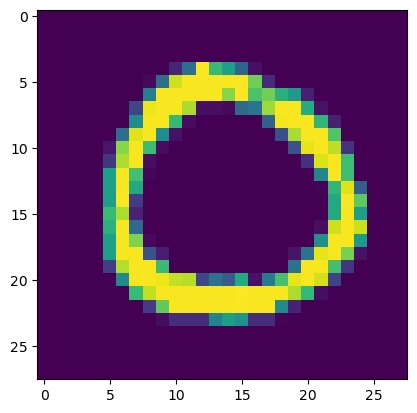

In [32]:
# plot a sample image
x = data[0][8]
y = data[1][8]
print(y)
print(x.shape)
plt.imshow(x.view(28,28))
plt.show()

In [33]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 10)
#         self.dropout = nn.Dropout(dropout)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)
model = Net()

In [34]:
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter

In [35]:
#train the model
writer = SummaryWriter()
epochs = 3
optimizer = optim.Adam(model.parameters(), lr = 0.0001)
loss_function = nn.NLLLoss() #because labels are numbers and not one hot encoded, also last layer in log_softmax (logits)
step = 0
losses = []
accuracies = []
for epoch in range(epochs):
    for X, y in train_set:
        y_pred = model(X.view(-1,28*28))
        loss = loss_function(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
#         correct = (torch.argmax(y_pred, 1) == y).sum().item()
#         training_acc = float(correct)/float(y.shape[0])
#         step +=  1
#         losses.append(loss.item())
#         accuracies.append(training_acc)
#         writer.add_scalar('Training Loss', loss.item(), global_step = step)
#         writer.add_scalar('Training Accuracy', training_acc, global_step = step)
#         writer.add_histogram('fc3', model.fc3.weight)
#     writer.add_scalar('Average Loss', sum(losses)/len(losses), epoch)
#     writer.add_scalar('Average Accuracy', sum(accuracies)/len(accuracies), epoch)
    print(loss)
# writer.flush()
# writer.close()

tensor(0.3694, grad_fn=<NllLossBackward0>)
tensor(0.3817, grad_fn=<NllLossBackward0>)
tensor(0.4308, grad_fn=<NllLossBackward0>)


In [25]:
print(y_pred.shape)
print(y.shape)

torch.Size([10, 10])
torch.Size([10])


In [29]:
# evaluate
total = 0
correct = 0
with torch.no_grad():
    for X, y in test_set:
        output = model(X.view(-1,28*28))
        for idx, y_pred in enumerate(output):
            if torch.argmax(y_pred) == y[idx]:
                correct += 1
            total += 1
print(f'Accuracy : {round(correct/total, 3)}')

Accuracy : 0.927


In [36]:
#CNN
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        x = torch.randn(28,28).view(-1,1,28,28)
        self.in_ftrs = None
        self.convs(x)
        self.fc1 = nn.Linear(self.in_ftrs, 256)
        self.fc2 = nn.Linear(256, 10)
    def convs(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
#         print(x.shape)
        if self.in_ftrs == None:
            self.in_ftrs = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x
    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self.in_ftrs)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
conv_model = CNN()

In [37]:
#train the model
import torch.optim as optim
epochs = 3
# step = 0
# losses = []
# accuracies = []
optimizer = optim.Adam(conv_model.parameters(), lr = 0.0001)
loss_function = nn.NLLLoss() #because labels are numbers and not one hot encoded, also last layer in log_softmax (logits)
for epoch in range(epochs):
    for X, y in train_set:
        y_pred = conv_model(X.view(-1,1,28,28))
        loss = loss_function(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
#         correct = (torch.argmax(y_pred, 1) == y).sum().item()
#         training_acc = float(correct)/float(y.shape[0])
#         step +=  1
#         losses.append(loss.item())
#         accuracies.append(training_acc)
#         writer.add_scalar('Training Loss', loss.item(), global_step = step)
#         writer.add_scalar('Training Accuracy', training_acc, global_step = step)
#         writer.add_histogram('fc2', model.fc2.weight)
#     writer.add_scalar('Average Loss', sum(losses)/len(losses), epoch)
#     writer.add_scalar('Average Accuracy', sum(accuracies)/len(accuracies), epoch)
    print(loss)
# writer.flush()
# writer.close()

tensor(0.1241, grad_fn=<NllLossBackward0>)
tensor(0.1743, grad_fn=<NllLossBackward0>)
tensor(0.0902, grad_fn=<NllLossBackward0>)


In [50]:
# evaluate
total = 0
correct = 0
with torch.no_grad():
    for X, y in test_set:
        output = conv_model(X.view(-1,1,28,28))
        for idx, y_pred in enumerate(output):
            if torch.argmax(y_pred) == y[idx]:
                correct += 1
            total += 1
print(f'Accuracy : {round(correct/total, 3)}')

Accuracy : 0.989


In [87]:
# write a function to manullay compute gradient of a linear regression model
x = torch.tensor([[6, 9, 8, 0], [1,2,3,4]], dtype= torch.float32)
y = torch.tensor([1, 0], dtype= torch.float32)
w = torch.randn((1, 4), requires_grad = True)
b = torch.zeros((1,2), requires_grad = True)
# z = w*x
# print(z)
# print(z.sum(1))
iters = 1000
lr = 0.01
for i in range(iters):
    y_pred = (w*x).sum(1) + b
    loss = torch.mean((y_pred-y)**2)
    loss.backward()
    with torch.no_grad():
        w -= lr*w.grad
        b -= lr*b.grad
    w.grad.zero_()
    b.grad.zero_()
print(y_pred)

tensor([[1.0000e+00, 3.6955e-06]], grad_fn=<AddBackward0>)


In [ ]:
# save and load a model:
torch.save(conv_model.state_dict(), 'best_model.pth')
torch.save(optimizer.state_dict(), 'best_opt.pth')
best_model = CNN()
best_opt = optim.Adam(best_model.parameters(), lr = 0.0001)
best_opt.load_state_dict(torch.load('best_opt.pth'))

In [ ]:
# How to handle imbalanced dataset? 
#1 = Modify loss function - give more wights to minority class
class_weights = torch.tensor([5,1,4])
loss_function = nn.NLLLoss(weight = class_weights)
#2 upsampling 
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 123)
# we have X and y as features and labels
resampled_x, resampled_y = smote.fit_resample(X,y)
#random downsample
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 123)
resampled_x, resampled_y = rus.fit_resample(X,y)
from torch.utils.data import DataLoader, WeightedRandomSampler
random_sampler = WightedRandomSampler(weights, num_samples) #weights and num_samples predefined
resampled_data = DataLoader(data, sampler = random_sampler)

In [ ]:
# reproducibilty of results:
#1- fix the seed: 
torch.manual_seed(6) 
torch.cuda.manual_seed(8)

In [81]:
#Tensor operations
A = torch.ones(3,2)
B = torch.ones(3,2)
c = A + B
D = torch.sub(A,0.5) #or A-0.5
E = torch.add(A, 0.5) #or A+0.5
F = A - B
G = A*B
GG = A**B #element-wise power
H = torch.mul(A,2)
I = torch.div(A,2)
J = torch.mm(A,B.transpose(0,1)) 
K = torch.mm(B,torch.t(A))
#reshape
L = torch.reshape(A, (1,6))
M = A.view(6,1)
#combine
N = torch.stack([A,B])
O = torch.cat([A,B], dim = 0)
P = torch.cat([A,B], dim =1)

In [83]:
print(N.shape)
print(O.shape)
print(P.shape)

torch.Size([2, 3, 2])
torch.Size([6, 2])
torch.Size([3, 4])


In [84]:
t = torch.rand(2,3) #unifrom between 0 and 1
print('t', t)
a = torch.randn(2,3) #normal dist with mean 0 and std 1
print('a', a)

t tensor([[0.0753, 0.0783, 0.2454],
        [0.4100, 0.9272, 0.2317]])
a tensor([[-1.5539, -0.2381, -0.1986],
        [ 1.3529, -0.5624, -1.0071]])


In [85]:
# more operations
q = torch.empty(2,3) #allocates memory space
z = torch.randn_like(w) #random matrix same shape as w; other examples: torch.ones_like torch.zero_like
#torch.tensor(data) creates a tensor copy of data if data is in shape of list or tuples or a mix of both  

In [ ]:
#data types
xx = torch.rand((2,3), dtype = torch.float32) #or .float64, .int32, etc
xx.to(torch.int32)

In [90]:
## tensor broadcasting rules:
# tensors have identical size or
# one of the dimensions is one or
# one of the dimensions of one does not exist in the other tensor
## Dimensions must match last to first 
a =     torch.ones(4, 3, 2)

b =torch.rand(3, 2)*a # 3rd & 2nd dims identical to a, dim 1 absent
print(b)

c = a * torch.rand(   3, 1) # 3rd dim = 1, 2nd dim identical to a
print(c)

d = a * torch.rand(   1, 2) # 3rd dim identical to a, 2nd dim = 1
print(d)

tensor([[[0.4972, 0.3110],
         [0.4918, 0.0226],
         [0.6509, 0.8509]],

        [[0.4972, 0.3110],
         [0.4918, 0.0226],
         [0.6509, 0.8509]],

        [[0.4972, 0.3110],
         [0.4918, 0.0226],
         [0.6509, 0.8509]],

        [[0.4972, 0.3110],
         [0.4918, 0.0226],
         [0.6509, 0.8509]]])
tensor([[[0.5678, 0.5678],
         [0.1038, 0.1038],
         [0.2897, 0.2897]],

        [[0.5678, 0.5678],
         [0.1038, 0.1038],
         [0.2897, 0.2897]],

        [[0.5678, 0.5678],
         [0.1038, 0.1038],
         [0.2897, 0.2897]],

        [[0.5678, 0.5678],
         [0.1038, 0.1038],
         [0.2897, 0.2897]]])
tensor([[[0.6721, 0.9178],
         [0.6721, 0.9178],
         [0.6721, 0.9178]],

        [[0.6721, 0.9178],
         [0.6721, 0.9178],
         [0.6721, 0.9178]],

        [[0.6721, 0.9178],
         [0.6721, 0.9178],
         [0.6721, 0.9178]],

        [[0.6721, 0.9178],
         [0.6721, 0.9178],
         [0.6721, 0.9178]]])


In [136]:
import math
# common functions -- Note: most of these functions with _ do the operation in place; e.g., torch.sin_()
a = torch.rand(2, 4) * 2 - 1
print('Common functions:')
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a, -0.5, 0.5))

# trigonometric functions and their inverses
angles = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
sines = torch.sin(angles)
inverses = torch.asin(sines)
print('\nSine and arcsine:')
print(angles)
print(sines)
print(inverses)

# bitwise operations
print('\nBitwise XOR:')
b = torch.tensor([1, 5, 11])
c = torch.tensor([2, 7, 10])
print(torch.bitwise_xor(b, c))

# comparisons:
print('\nBroadcasted, element-wise equality comparison:')
d = torch.tensor([[1., 2.], [3., 4.]])
e = torch.ones(1, 2)  # many comparison ops support broadcasting!
print(torch.eq(d, e)) # returns a tensor of type bool

# reductions:
print('\nReduction ops:')
print(torch.max(d))        # returns a single-element tensor
print(torch.max(d).item()) # extracts the value from the returned tensor
print(torch.mean(d))       # average
print(torch.std(d))        # standard deviation
print(torch.prod(d))       # product of all numbers
print(torch.unique(torch.tensor([1, 2, 1, 2, 1, 2]))) # filter unique elements

# vector and linear algebra operations
v1 = torch.tensor([1., 0., 0.])         # x unit vector
v2 = torch.tensor([0., 1., 0.])         # y unit vector
m1 = torch.rand(2, 2)                   # random matrix
m2 = torch.tensor([[3., 0.], [0., 3.]]) # three times identity matrix

print('\nVectors & Matrices:')
print(torch.cross(v2, v1)) # negative of z unit vector (v1 x v2 == -v2 x v1) 
print(m1)
m3 = torch.matmul(m1, m2)
print(m3)                  # 3 times m1
print(torch.svd(m3))       # singular value decomposition

Common functions:
tensor([[0.1328, 0.5505, 0.4958, 0.6799],
        [0.4487, 0.0192, 0.1758, 0.5010]])
tensor([[1., -0., 1., -0.],
        [-0., 1., -0., 1.]])
tensor([[ 0., -1.,  0., -1.],
        [-1.,  0., -1.,  0.]])
tensor([[ 0.1328, -0.5000,  0.4958, -0.5000],
        [-0.4487,  0.0192, -0.1758,  0.5000]])

Sine and arcsine:
tensor([0.0000, 0.7854, 1.5708, 2.3562])
tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.7854, 1.5708, 0.7854])

Bitwise XOR:
tensor([3, 2, 1])

Broadcasted, element-wise equality comparison:
tensor([[ True, False],
        [False, False]])

Reduction ops:
tensor(4.)
4.0
tensor(2.5000)
tensor(1.2910)
tensor(24.)
tensor([1, 2])

Vectors & Matrices:
tensor([ 0.,  0., -1.])
tensor([[0.4217, 0.9537],
        [0.6541, 0.5101]])
tensor([[1.2652, 2.8610],
        [1.9623, 1.5304]])
torch.return_types.svd(
U=tensor([[-0.7916, -0.6110],
        [-0.6110,  0.7916]]),
S=tensor([3.8836, 0.9471]),
V=tensor([[-0.5666,  0.8240],
        [-0.8240, -0.5666]]))


In [107]:
a = torch.tensor([[1,30,5], [5, 9, 11]])
print(a.sum(0))

tensor([ 6, 39, 16])


In [ ]:
a = torch.rand(2, 2)
b = torch.rand(2, 2)
c = torch.zeros(2, 2)
old_id = id(c)

print(c)
d = torch.matmul(a, b, out=c)
print(c)                # contents of c have changed

assert c is d           # test c & d are same object, not just containing equal values
assert id(c) == old_id  # make sure that our new c is the same object as the old one

torch.rand(2, 2, out=c) # works for creation too!
print(c)                # c has changed again
assert id(c) == old_id  # still the same object!

In [ ]:
# copy tensor
a = torch.rand(2, 2, requires_grad=True) # turn on autograd
print(a)

b = a.clone()
print(b)

c = a.detach().clone() #.detach --> no gradient
print(c)

print(a)

In [ ]:
## Squeeze and Unsqueeze 
# unsqueeze adds a dimension of extent one at given position
# example use: need to input a single datapoint x: (6,5) as a batch of size 1 to the model -> x.unsqueeze(0) -> x:(1, 6, 5)
# unsqueeze is usefull to enable broadcasting; because it adds a dimension of 1 whereever needed 
# squeeze removes extent of dimension 1 from a given position: x: (1,20) -> x.squeeze(0) -> x: (20, )
# x: (2,3) -> x.squeeze(0): no change because pos 0 is not of dimension 1
# .squeeze_ and .unsqueeze_ modify the tensor in place 

In [139]:
a = torch.rand(3, 226, 226)
b = a.unsqueeze(0)

print(a.shape)
print(b.shape)

torch.Size([3, 226, 226])
torch.Size([1, 3, 226, 226])


In [140]:
c = torch.rand(1, 1, 1, 1, 1)
print(c)

tensor([[[[[0.1760]]]]])


In [141]:
a = torch.rand(1, 20)
print(a.shape)
print(a)

b = a.squeeze(0)
print(b.shape)
print(b)

c = torch.rand(2, 2)
print(c.shape)

d = c.squeeze(0)
print(d.shape)

torch.Size([1, 20])
tensor([[0.1949, 0.3038, 0.0990, 0.8200, 0.6339, 0.1725, 0.8114, 0.2419, 0.3840,
         0.5465, 0.2182, 0.7251, 0.8358, 0.3082, 0.5330, 0.4126, 0.2973, 0.8230,
         0.1259, 0.8779]])
torch.Size([20])
tensor([0.1949, 0.3038, 0.0990, 0.8200, 0.6339, 0.1725, 0.8114, 0.2419, 0.3840,
        0.5465, 0.2182, 0.7251, 0.8358, 0.3082, 0.5330, 0.4126, 0.2973, 0.8230,
        0.1259, 0.8779])
torch.Size([2, 2])
torch.Size([2, 2])


In [142]:
a = torch.ones(4, 3, 2)
b = torch.rand(   3)     # trying to multiply a * b will give a runtime error
c = b.unsqueeze(1)       # change to a 2-dimensional tensor, adding new dim at the end
print(c.shape)
print(a * c)   

torch.Size([3, 1])
tensor([[[0.4553, 0.4553],
         [0.9682, 0.9682],
         [0.8033, 0.8033]],

        [[0.4553, 0.4553],
         [0.9682, 0.9682],
         [0.8033, 0.8033]],

        [[0.4553, 0.4553],
         [0.9682, 0.9682],
         [0.8033, 0.8033]],

        [[0.4553, 0.4553],
         [0.9682, 0.9682],
         [0.8033, 0.8033]]])


In [ ]:
### Optimization Methods 
## Stochastic Gradient Descent (SGD):
# Hyperparameters:
# lr (learning rate): Determines the step size at each iteration.
# momentum: Accelerates SGD in relevant directions and dampens oscillations.
# Use Cases:
# Classic optimization algorithm widely used in training neural networks.
# Explanation:
# SGD updates the model parameters by moving in the direction opposite to the gradient of the loss function 
# with respect to the parameters.
optimizer_sgd = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

## Adam (Adaptive Moment Estimation):
# Hyperparameters:
# lr (learning rate): Determines the step size.
# betas: Coefficients for computing running averages of gradient and its square.
# eps: Term to improve numerical stability.
# Use Cases:
# Popular choice for training deep neural networks.
# Explanation:
# Adam combines the advantages of AdaGrad and RMSProp by using both the first-order moment (mean) and the 
#second-order moment (variance) of the gradients.
optimizer_adam = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08)

## Adagrad (Adaptive Gradient Algorithm):
# Hyperparameters:
# lr (learning rate): Determines the step size.
# lr_decay: Learning rate decay over each update.
# eps: Term to improve numerical stability.
# Use Cases:
# Suitable for sparse data or problems with differing gradients across parameters.
# Explanation:
# Adagrad adapts the learning rate for each parameter based on the historical gradients for that parameter.
optimizer_adagrad = optim.Adagrad(model.parameters(), lr=0.01, lr_decay=0, eps=1e-10)

## RMSprop (Root Mean Square Propagation):
# Hyperparameters:
# lr (learning rate): Determines the step size.
# alpha: Smoothing constant.
# eps: Term to improve numerical stability.
# Use Cases:
# Addresses Adagrad's diminishing learning rates by using a moving average of squared gradients.
# Explanation:
# RMSprop adapts the learning rates separately for each parameter based on the average of recent magnitudes of 
# the gradients for that parameter.
optimizer_rmsprop = optim.RMSprop(model.parameters(), lr=0.001, alpha=0.99, eps=1e-08)

## AdamW (Adam Weight Decay):
# Hyperparameters:
# Same as Adam, but includes weight decay (weight_decay).
# Use Cases:
# Variation of Adam that decouples weight decay regularization from the optimization steps.
# Explanation:
# AdamW is similar to Adam, but it applies weight decay directly to the parameters rather than to the gradient.
optimizer_adamw = optim.AdamW(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01)

## LBFGS (Limited-memory Broyden–Fletcher–Goldfarb–Shanno):
# Hyperparameters:
# max_iter: Maximum number of iterations.
# Use Cases:
# Useful for problems with relatively small datasets or low-dimensional parameter spaces.
# Explanation:
# LBFGS is a quasi-Newton optimization algorithm that approximates the inverse Hessian matrix to update parameters.
optimizer_lbfgs = optim.LBFGS(model.parameters(), max_iter=20)

## SGD with momentum:
# Hyperparameters:
# lr (learning rate), momentum.
# Use Cases:
# Accelerates SGD by accumulating a fraction of past gradients.
# Explanation:
# SGD with momentum helps in reducing oscillations and converging faster in relevant directions.
optimizer_sgd_momentum = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

## SGD with Nesterov momentum:
# Hyperparameters:
# lr (learning rate), momentum.
# Use Cases:
# Improvement over regular SGD with momentum, particularly in deep learning.
# Explanation:
# SGD with Nesterov momentum computes the gradient of the loss function at the "lookahead" position, 
# resulting in improved convergence.
optimizer_sgd_nesterov = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True)

In [ ]:
## Building custom blocks used in transfromers
1# Layer Normalization --> this has built-in method nn.LayerNorm(features) but lets build
# x --> alpha*(x-mean)/(std+eps) + bias
class LayerNormalization(nn.Module):
    def __init__(self, features, eps):
        super().__init__()
        self.eps = eps
        self.alpha = nn.Parameter(torch.ones(features))
        self.bias = nn.Parameter(torch.zeros(features))
    def forward(self, x):
        mean = x.mean(dim = -1, keepdim = True)
        std = x.std(dim = -1, keepdim = True)
        return self.alpha*(x-mean)/(std+eps) + self.bias

#2 Input Embedding
class InputEmbedding(nn.Module):
    def __init__(self, d_model, vocab_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, d_model)
    def forward(self, x):
        return self.embedding(x)

#3 FeedForward two fully connected layers with dropout 
class FeedForward(nn.Module):
    def __init__(self, d_model, d_ff, dropout):
        super().__init__()
        self.dropout = dropout
        self.fc1 = nn.Linear(d_model, d_ff)
        self.dropout = nn.Dropout(self.dropout)
        self.fc2 = nn.Linear(d_ff, d_model)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x
    
#4 Positional Encoding: pe[2i] = sin(pos/10000**(2*i/d_model)) pe[2i+1] = cos(pos/10000**(2*i/d_model))
class PositionalEncoding(nn.Module):
    def __init__(self, seq_ln, d_model, dropout):
        super().__init__()
        pe = torch.zeros(seq_ln, d_model)
        self.dropout = nn.Dropout(dropout)
        pos = torch.arange(0, seq_ln, dtype = torch.float).unsqueeze(1) #seq_ln*1
        div = torch.exp(torch.arange(0, d_model, 2)).float()*(-math.log(10000)/d_model)
        pe[:,0::2] = sin(pos*div)
        pe[:, 1::2] = cos(pos*div)
        pe.unsqueeze(0) #add batch dim
        self.register_buffer('pe', pe) # we register encoding as a buffer so it is a Module state and not a param
    def forward(self, x):
        x = x + self.pe[:, :x.shape[1],:].detach() # detach from computational graph
        return self.dropout(x)
    
#5 Residual connection
class ResidualConnection(nn.Module):
    def __init__(self, features, dropout):
        super().__init__()
        self.dropout = nn.Dropout(dropout)
        self.norm = LayerNormalization(features)
    def forward(self, x, sublayer):
        return x + self.dropout(sublayer(self.norm(x)))

#6 Multi Head Attention Block : there is a built-in method nn.MultiHeadAttention(input_dim, number_heads, dropout)
class MultiHeadAttentionBlock(nn.Module):
    def __init__(self, d_model, num_heads, dropout):
        super().__init__()
        assert d_model%num_heads == 0, 'dimension mismatch'
        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model//num_heads
        self.w_q = nn.Linear(de_model, d_model, bias = False)
        self.w_k = nn.Linear(de_model, d_model, bias = False)
        self.w_v = nn.Linear(de_model, d_model, bias = False)
        self.w_o = nn.Linear(de_model, d_model, bias = False)
        self.dropout = nn.Dropout(dropout)
    @staticmethod
    def attention(query, key, value, mask, dropout: nn.Dropout):
        d_k = query.shape[-1]
        attention_scores = (query @ key.transpose(-2,-1))/math.sqrt(d_k)
        if mask is not None:
            attention_scores.masked_fill(mask, -1e9)
        if dropout is not None:
            attention_scores = dropout(attention_scores)
        return attention_scores @ value, attention_scores
    
    def forward(self, q, k, v, mask):
        query = self.w_q(q)
        key = self.w_k(k)
        value = self.w_v(v)
        # (batch, seq_ln, d_model) -> (batch, seq_ln, h, d_k) -> (batch, h, seq_ln, dk)
        query = query.view(query.shape[0], query.shape[1], self.num_heads, self.d_k).transpose(1,2)
        value = value.view(value.shape[0], value.shape[1], self.num_heads, self.d_k).transpose(1,2)
        key = key.view(key.shape[0], key.shape[1], self.num_heads, self.d_k).transpose(1,2)
        x, self.attention_scores = MultiHeadAttentionBlock.attention(query, key, value, self.dropout)
        x = x.transpose(1,2).contiguous().view(x.shape[0],-1, d_model)
        x = self.w_o(x)
        return x

In [55]:
a = torch.tensor([[1, 2, 9]])
b = a.repeat(3,1)
print(b)

tensor([[1, 2, 9],
        [1, 2, 9],
        [1, 2, 9]])
